<a href="https://colab.research.google.com/github/Manjunath727/DLwithTF/blob/master/c1w3l1_NeuralNet_ConvNet_Comparision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Traditional Neural Net approach

import tensorflow as tf

# Load the data
f_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = f_mnist.load_data()

# Normalize the data
train_images = train_images/255.0
test_images = test_images/255.0

# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5)

# Loss on test images
test_loss = model.evaluate(test_images, test_labels)

In [0]:
# Convolutinal Neural Networks

import tensorflow as tf

# Load the data
f_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = f_mnist.load_data()

# Reshaping the input images
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000, 28,28,1)

# Normalize the input image data
x_train = x_train/255.0
x_test = x_test/255.0

# Build the convolution neural net
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
  ])

#Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

# Train the model for x_train
model.fit(x_train, y_train, epochs=5)

Visualizing the effect of Convolution

In [0]:
# Checking the test_images
print(y_test[:50])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2]


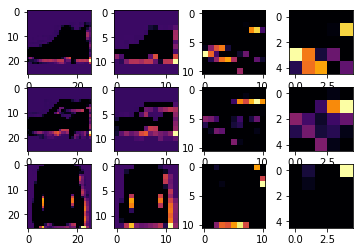

In [0]:
# Visualize convolution on images
import matplotlib.pyplot as plt

f, axarr = plt.subplots(3,4)

FIRST_IMG = 0
SECOND_IMG = 23
THIRD_IMG = 26
CONV_NUM = 1

from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(x_test[FIRST_IMG].reshape(1,28,28,1))[x]
  axarr[0,x].imshow(f1[0,:,:,CONV_NUM], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(x_test[SECOND_IMG].reshape(1,28,28,1))[x]
  axarr[1,x].imshow(f2[0,:,:,CONV_NUM], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(x_test[THIRD_IMG].reshape(1,28,28,1))[x]
  axarr[2,x].imshow(f3[0,:,:,CONV_NUM], cmap='inferno')
  axarr[2,x].grid(False)
  